In [1]:
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.features
import rasterio.warp
#Importing the Nominatim geocoder class 
#from geopy.geocoders import Nominatim
from shapely.geometry import point, Polygon
import matplotlib as plt

%matplotlib inline

## Open geotiff file

In [2]:
# open an example geotiff file with rasterio

with rasterio.open('DHMVIIDTMRAS1m_k01.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)


{'type': 'Polygon', 'coordinates': [[[4.296715, 51.532501], [4.296811, 51.46959], [4.311201, 51.469597], [4.31119, 51.478585], [4.325583, 51.478591], [4.325575, 51.487578], [4.339971, 51.487582], [4.339965, 51.49657], [4.368762, 51.496573], [4.368762, 51.50556], [4.397564, 51.505557], [4.39757, 51.514544], [4.426378, 51.514533], [4.42639, 51.523521], [4.484017, 51.523478], [4.484039, 51.532465], [4.296715, 51.532501]]]}
{'type': 'Polygon', 'coordinates': [[[4.484039, 51.532465], [4.541677, 51.532395], [4.541375, 51.45151], [4.296839, 51.451615], [4.296811, 51.46959], [4.311201, 51.469597], [4.31119, 51.478585], [4.325583, 51.478591], [4.325575, 51.487578], [4.339971, 51.487582], [4.339965, 51.49657], [4.368762, 51.496573], [4.368762, 51.50556], [4.397564, 51.505557], [4.39757, 51.514544], [4.426378, 51.514533], [4.42639, 51.523521], [4.484017, 51.523478], [4.484039, 51.532465]]]}


In [13]:
df = pd.DataFrame.from_dict(geom)

In [15]:
df.head()

,type,coordinates
0,Polygon,"[[4.484039, 51.532465], [4.541677, 51.532395],..."


## Open .shp file

In [14]:
path = 'C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp'

In [17]:
test = gpd.read_file(path)

In [18]:
test

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


<AxesSubplot:>

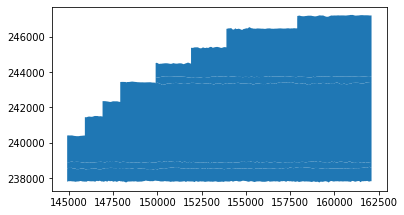

In [19]:
test.plot()

## Geocode the provided address:

In [16]:
address = 'Tolhuis, Sint-Pietersvliet 7, 2000 Antwerpen'

In [8]:
location = gpd.tools.geocode(address)

In [9]:
location

,geometry,address
0,POINT (4.40084 51.22561),"The Beacon (Tolhuis), 7, Sint-Pietersvliet, 20..."


<AxesSubplot:>

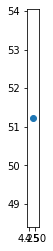

In [10]:
location.geometry.plot()